In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Understanding and Representation:


In [2]:
df =pd.read_csv("audi.csv")

df.shape
df.head()
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [3]:
model_col=df["model"]
def PreProcessing(df):
    transmission_mapping = lambda x: 1 if x == 'Manual' else (0 if x == 'Automatic' else 2)
    fueltype_mapping = lambda x: 1 if x == 'Petrol' else (0 if x == 'Diesel' else 2)
    
    df["transmission"]=df['transmission'].apply(transmission_mapping)
    df["fuelType"]=df["fuelType"].apply(fueltype_mapping)
    df=df.drop(["model"],axis=1)

    df=df-df.mean()
    df=np.matrix(df)
    return df


In [4]:
dfn=PreProcessing(df)
df_pair=pd.DataFrame(PreProcessing(df))
df_pair["model"]=model_col


## 2. Implementing PCA using Covariance Matrices:

In [5]:
def sort(df):
    return np.sort(df)

In [6]:
def CovWithoutNumpy(df):
    (N,M)=df.shape
    cov = np.zeros((M, M))
    for i in range(N):
        df_mean_i = np.mean(df[:, i])
        for j in range(M):
            df_mean_j = np.mean(df[:, j])
            cov[i, j] = np.sum((df[:, i] - df_mean_i) * np.transpose((df[:, j] - df_mean_j))) / (N - 1)

    return cov

In [7]:
def CovWithNumpy(df):                                         # finding covariance matrix
    cov_matrix = np.cov(df.T)
    return cov_matrix

In [8]:
cov_matrix=CovWithNumpy(dfn)

## 3. Eigenvalue-Eigenvector Equation:

In [9]:
def EigenVal(cov_matrix):                                   # finding eigenvalues and siegnvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues,eigenvectors

In [10]:
eigenvalues,eigenvectors=EigenVal(cov_matrix)


## 4. Solving for principal components:

In [11]:
def PCA_Components(df, no_of_features, eigenvectors):
    df_pca = np.zeros((df.shape[0], no_of_features))
    
    for i in range(eigenvectors.shape[1]):
        feature=eigenvectors[:,i]
        df_pca[:, i] = np.dot(df,feature)
        
    return df_pca

In [12]:
def top_k(eigenvalues, eigenectors, k):
    indices=np.argsort(eigenvalues)[-k:][::-1]

    k_eigenvectors=eigenvectors[:,indices]

    return k_eigenvectors
    

In [13]:
k_eigenvectors=top_k(eigenvalues, eigenvectors, 3)
k_eigenvectors.shape[1]

3

In [14]:
df_pca=PCA_Components(dfn,3, k_eigenvectors)
pd.DataFrame(df_pca).head()

,0,1,2
0,5503.715115,-12667.574784,47.071816
1,-12781.523844,-2638.308569,-93.807998
2,-8491.312291,-9779.293895,-70.382705
3,-2923.886112,-5466.715907,30.600533
4,20049.692338,-12268.103153,33.360126


## 5. Sequential Variance Increase:

In [15]:
total_variance=np.sum(eigenvalues)
print(total_variance)

689739322.2089564


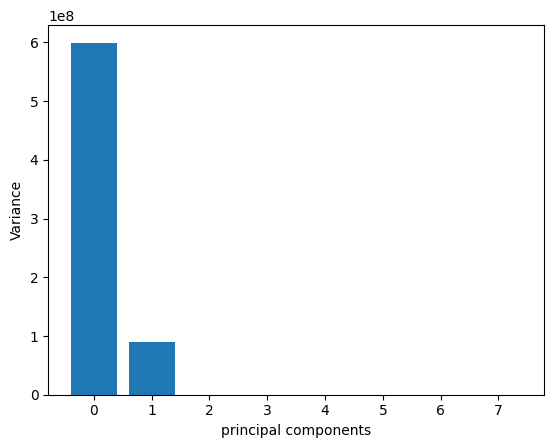

<BarContainer object of 8 artists>

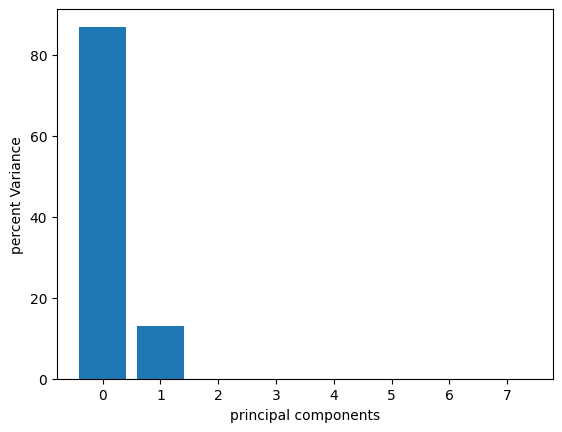

In [16]:
# plotting bar char for variance and percentage variance capture

eigenvalues_sorted=sort(eigenvalues)[::-1]
indices = np.arange(len(eigenvalues_sorted))

plt.bar(indices,eigenvalues_sorted )
plt.xlabel('principal components')
plt.ylabel('Variance')


plt.show()

sum=np.sum(eigenvalues_sorted)
eigenvalues_percent=[]
for i in eigenvalues_sorted:
    eigenvalues_percent.append((i/sum)*100)
    
plt.xlabel('principal components')
plt.ylabel('percent Variance')
plt.bar(indices,eigenvalues_percent)

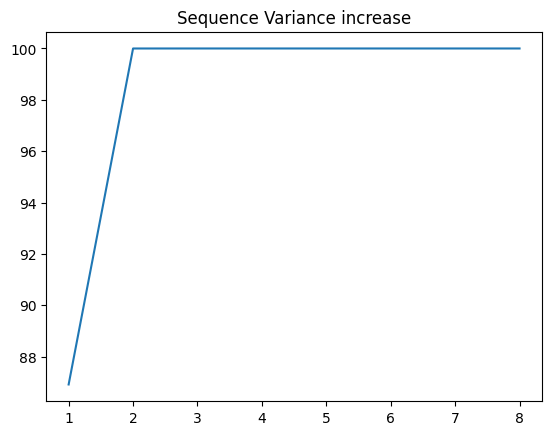

In [17]:
eigenvalues_sorted=sort(eigenvalues)[::-1]
eigenvalues_cumulative =[]
sum=0

sumall=np.sum(eigenvalues)
for i in eigenvalues_sorted:
    sum=sum+i;
    eigenvalues_cumulative.append((sum/sumall)*100)
    
index = list(range(1,len(eigenvalues_cumulative)+1))

plt.title("Sequence Variance increase")
plt.plot(index,eigenvalues_cumulative)

## 6. Visualization using Pair Plots:


D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


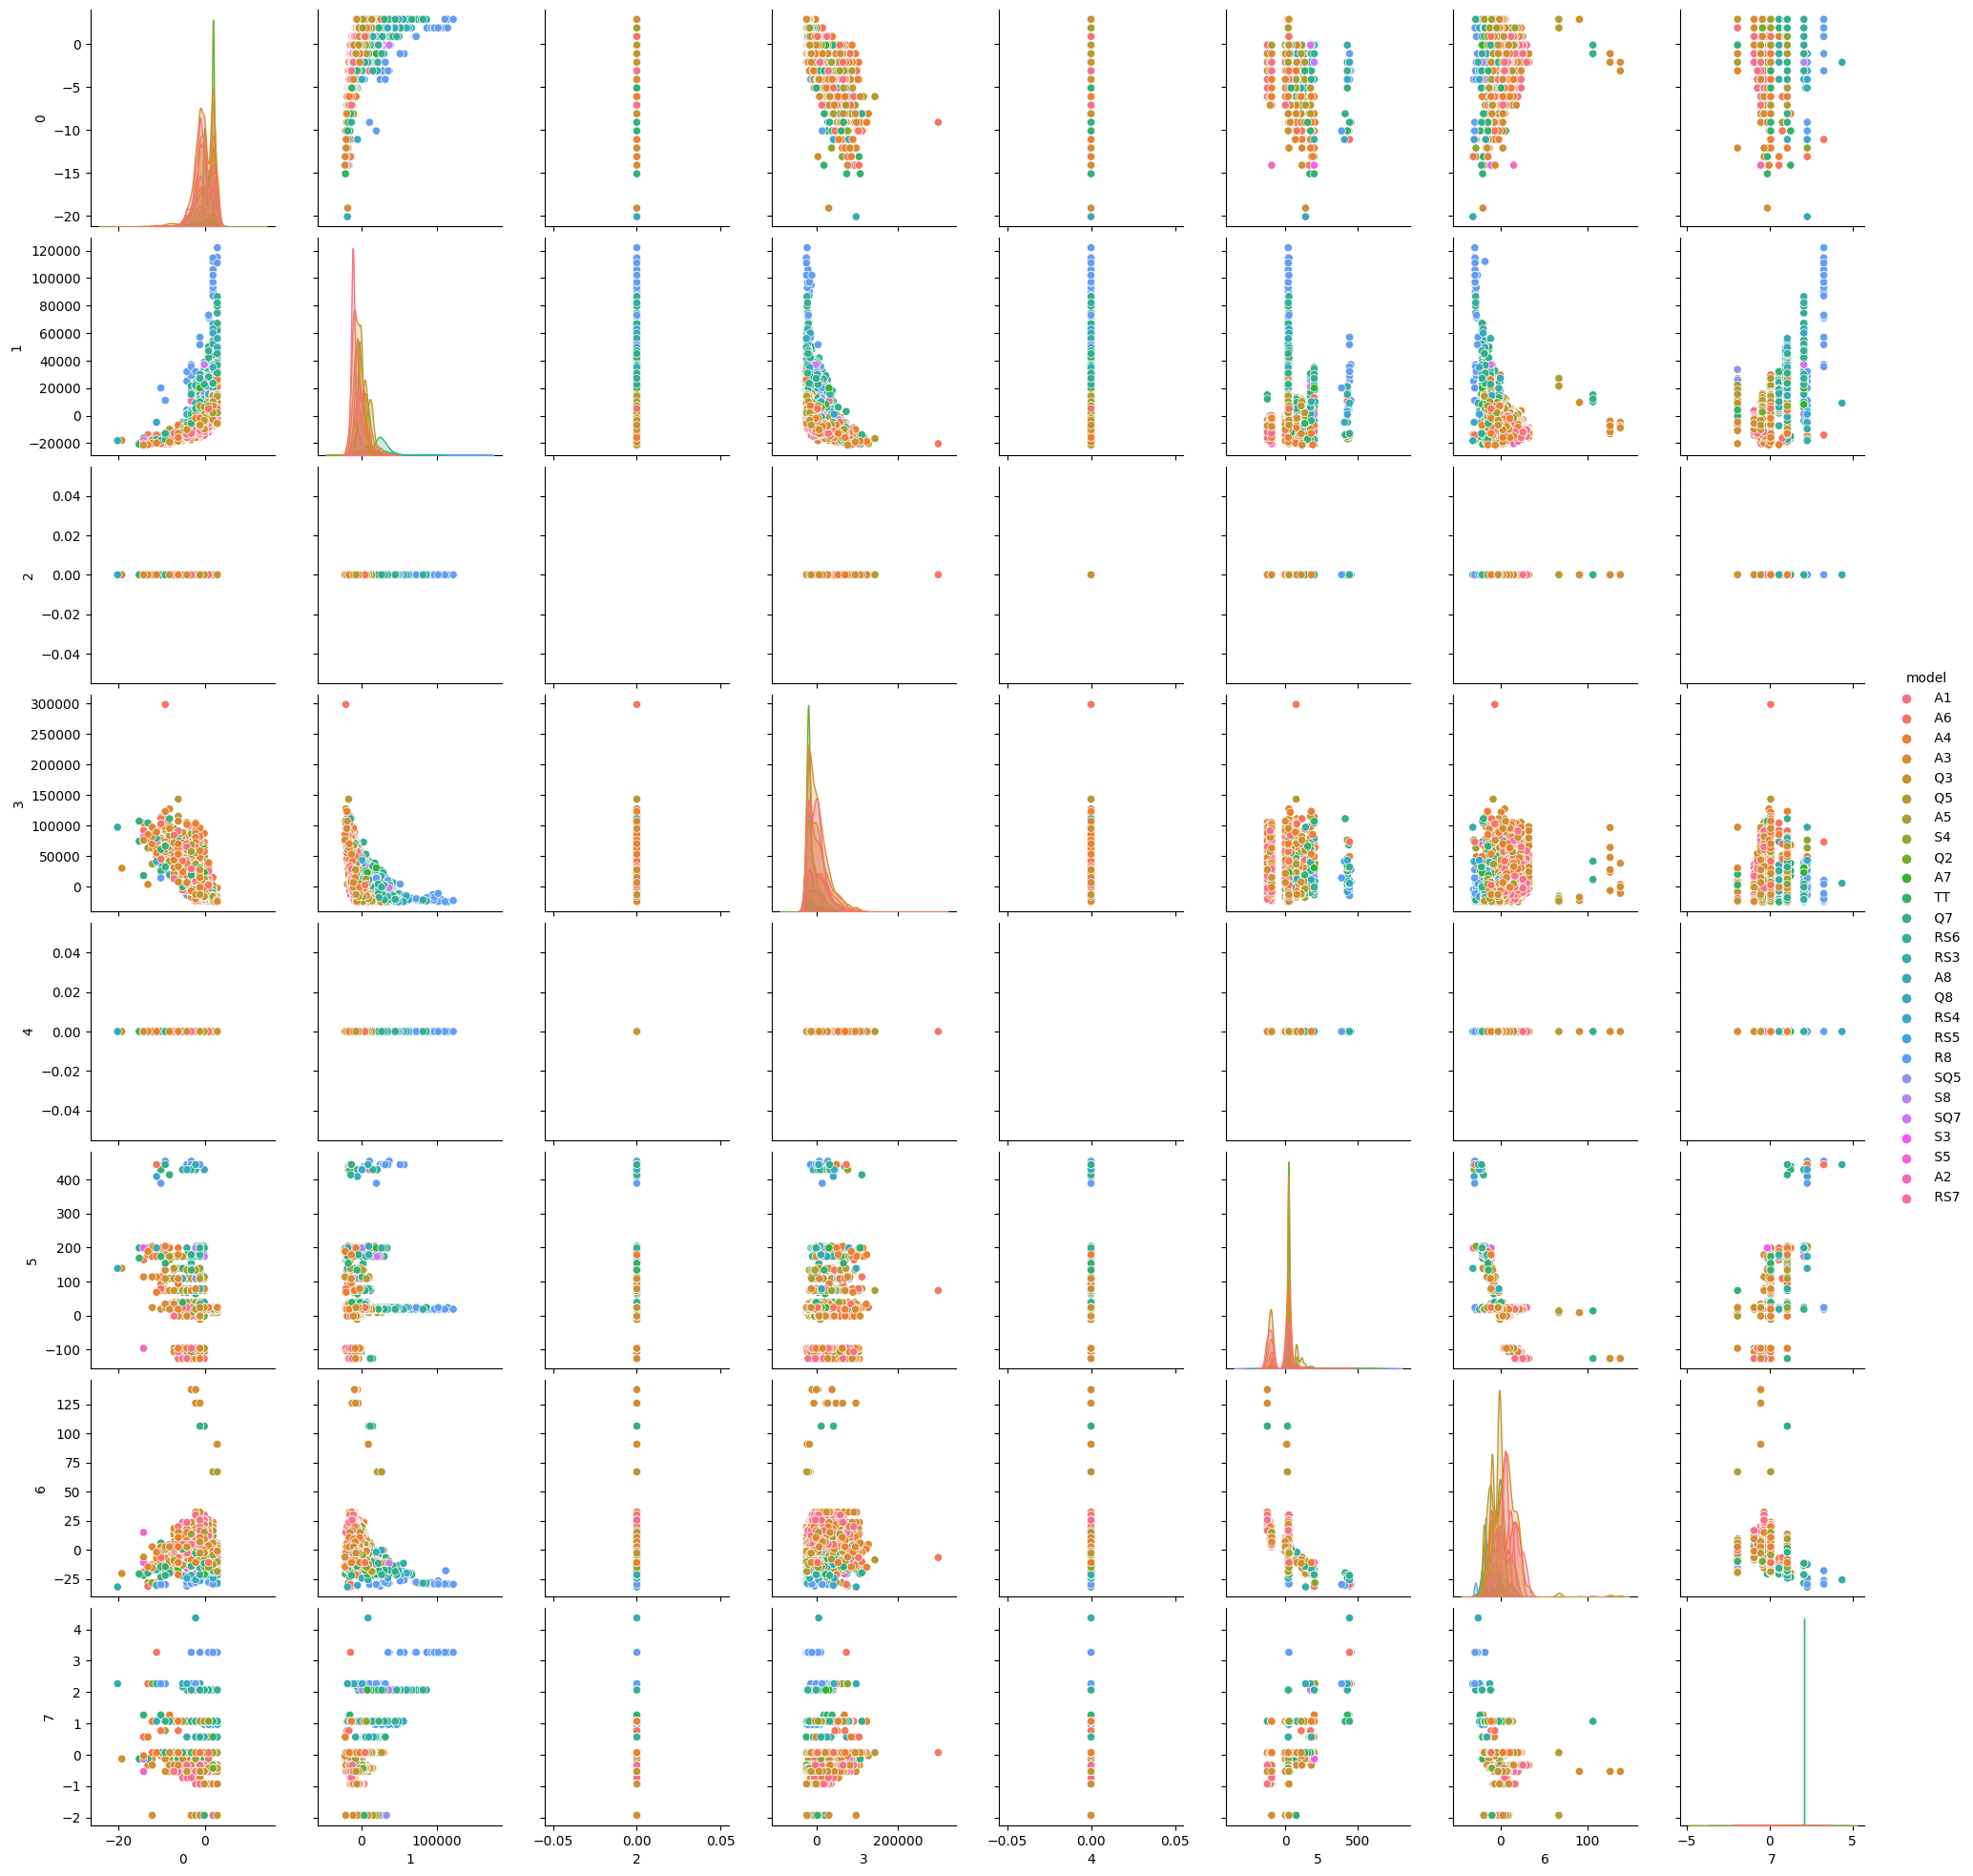

In [18]:
sns.pairplot(df_pair, hue="model")   # pairplot for original data

In [19]:
# considering number of components =2 from above graph
no_effecient_components = 2

In [20]:
cov_matrix=CovWithNumpy(dfn)
eigenvalues,eigenvectors=EigenVal(cov_matrix)

In [21]:
indices=np.argsort(eigenvalues)[-no_effecient_components:][::-1]
selected_eigenvectors=eigenvectors[:,indices]

In [22]:
x_pca=np.zeros((dfn.shape[0], no_effecient_components))

In [23]:
for i in range(2):
    feature=selected_eigenvectors[:,i]
    x_pca[:,i]=np.dot(dfn,feature)
    

D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


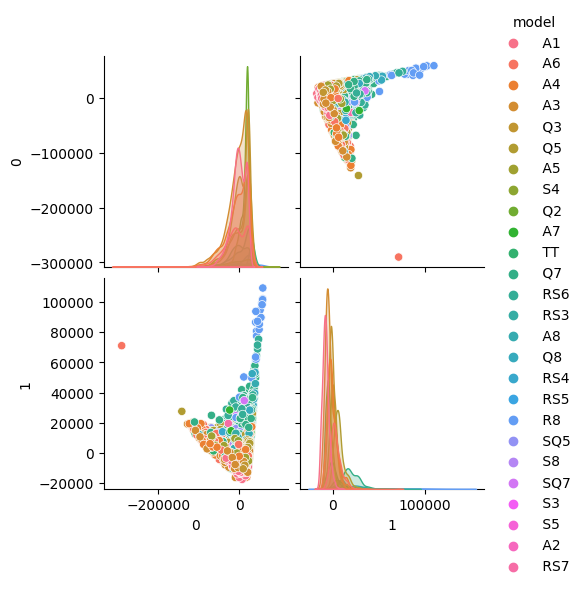

In [24]:
df_pca_effecient=pd.DataFrame(x_pca)
df_pca_effecient["model"]=model_col
sns.pairplot(df_pca_effecient, hue="model")

In [25]:
x_pca_all=np.zeros((dfn.shape[0], 8))

In [26]:
for i in range(8):
    feature=eigenvectors[:,i]
    x_pca_all[:,i]=np.dot(dfn,feature)
    

In [27]:
df_pca_all=pd.DataFrame(x_pca_all)
df_pca_all["model"]=model_col

D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


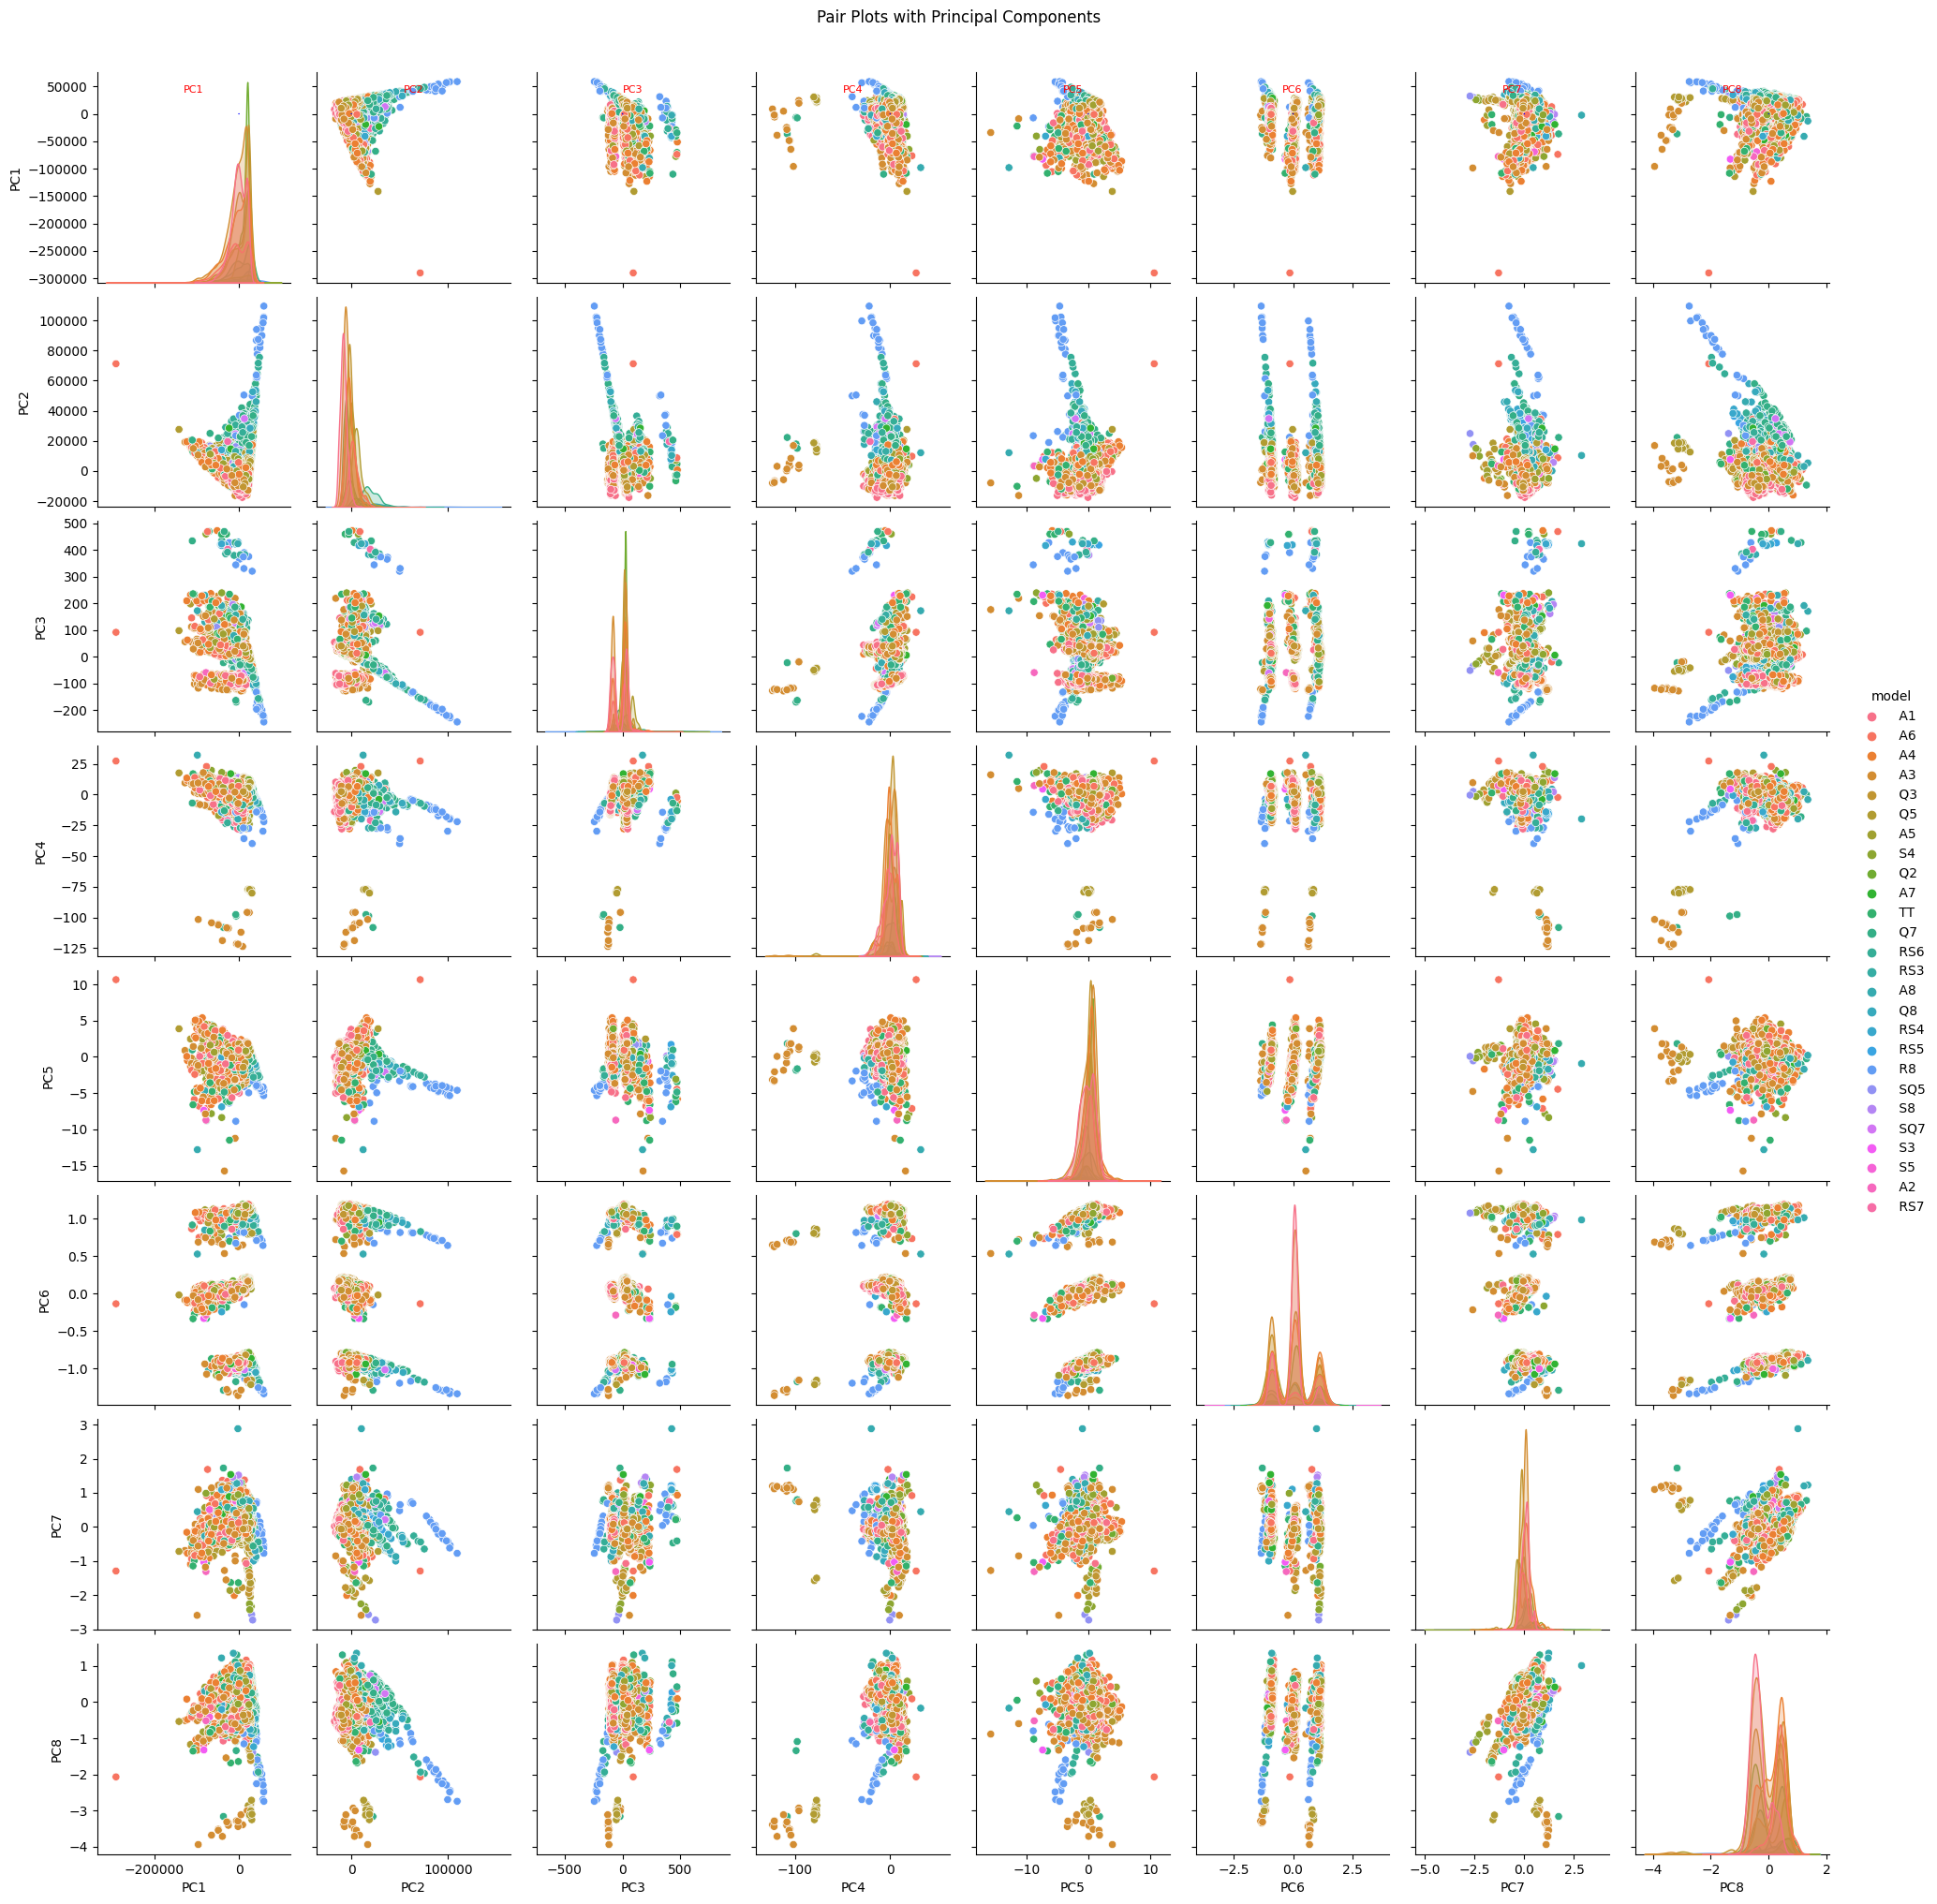

In [28]:
pc_df = pd.DataFrame(data=x_pca_all, columns=[f'PC{i+1}' for i in range(dfn.shape[1])])


pc_df['model'] = model_col


g = sns.pairplot(pc_df, hue='model')


for i, (ax, pc) in enumerate(zip(g.axes.flat, eigenvectors)):
    ax.annotate(f'PC{i+1}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=8, color='red')
    ax.quiver(0, 0, pc[0], pc[1], angles='xy', scale_units='xy', scale=50000, color='blue')

plt.suptitle('Pair Plots with Principal Components', y=1.02)
plt.show()